<a href="https://colab.research.google.com/github/BlackBoyZeus/WeightWatcher/blob/master/examples/WW-GPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeightWatcher - GPT

This notebook reproduces Figure 6(b) from our [Nature paper](https://www.nature.com/articles/s41467-021-24025-8)

It compares the distribution of layer PL Alpha $\alpha$ metrics for the the GPT and GPT2 pretrained models


And discussed on the [CalculatedContent Blog](https://calculatedcontent.com/2021/07/09/how-to-tell-if-you-have-trained-your-model-with-enough-data/)



In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher


In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip install transformers weightwatcher

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 1.8 MB/s eta 0:00:00


In [3]:
import torch
import weightwatcher as ww
torch.__version__, ww.__version__

('2.3.1+cu121', '0.7.5.2')

In [4]:
import transformers
from transformers import OpenAIGPTModel,GPT2Model

In [5]:
gpt_model = OpenAIGPTModel.from_pretrained('openai-gpt')
gpt_model.eval();

gpt2_model = GPT2Model.from_pretrained('gpt2')
gpt2_model.eval();

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/479M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

In [6]:
watcher = ww.WeightWatcher(model=gpt_model)
gpt_details = watcher.analyze()

In [ ]:
watcher = ww.WeightWatcher(model=gpt2_model)
gpt2_details = watcher.analyze()

INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
tensforflow version 2.1.0
keras       version 2.2.4-tf
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img


In [7]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7,5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

Text(0.5, 0, 'alpha $(\\alpha)$ PL exponent')

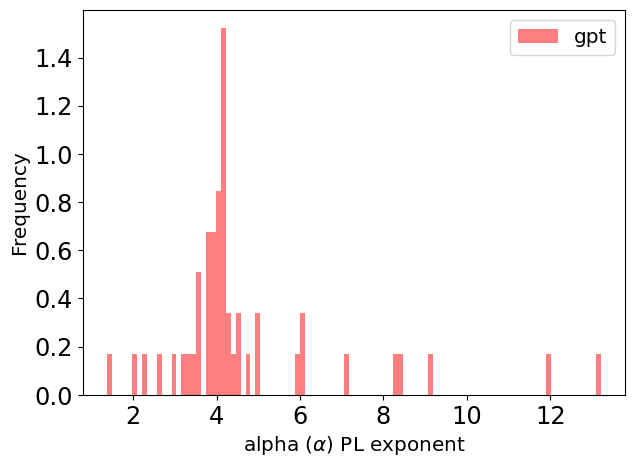

In [8]:
gpt_details.alpha.plot.hist(bins=100, color='red', alpha=0.5, density=True, label='gpt')
plt.legend()
plt.xlabel(r"alpha $(\alpha)$ PL exponent")

NameError: name 'gpt2_details' is not defined

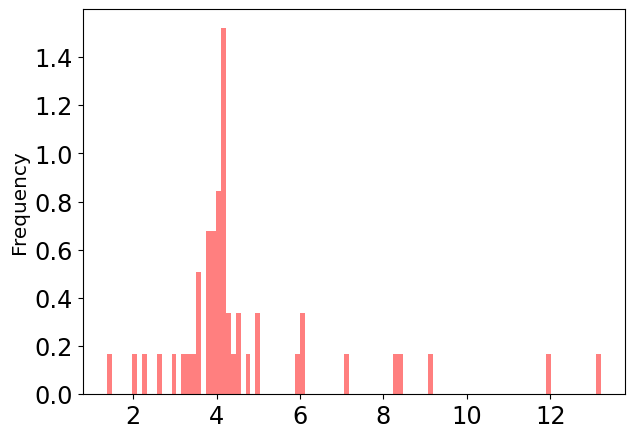

In [9]:
gpt_details.alpha.plot.hist(bins=100, color='red', alpha=0.5, density=True, label='gpt')
gpt2_details.alpha.plot.hist(bins=100, color='green', density=True, label='gpt2')
plt.legend()
plt.xlabel(r"alpha $(\alpha)$ PL exponent")